# TASK 2
IRIS FLOWER CLASSIFICATION

In [54]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv('downloads/IRIS.csv')

In [56]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
data.shape

(150, 5)

In [58]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


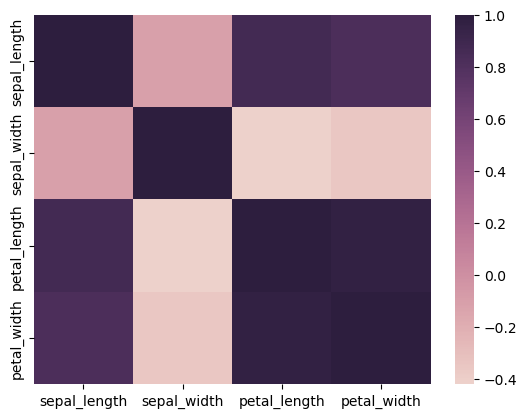

In [60]:
#Exploratory Data Analysis (EDA)
sns.heatmap(data.corr(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

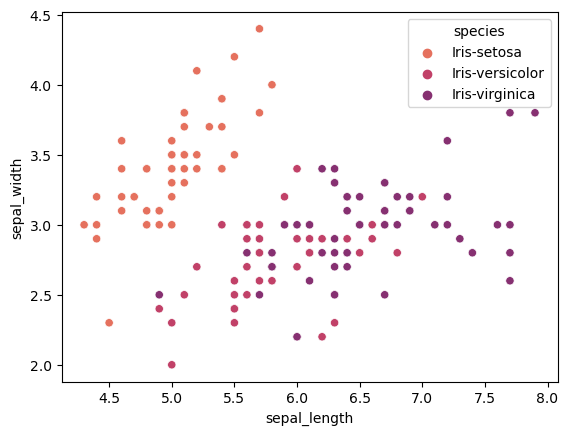

In [61]:
#Visualization
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data, palette="flare")
plt.show()

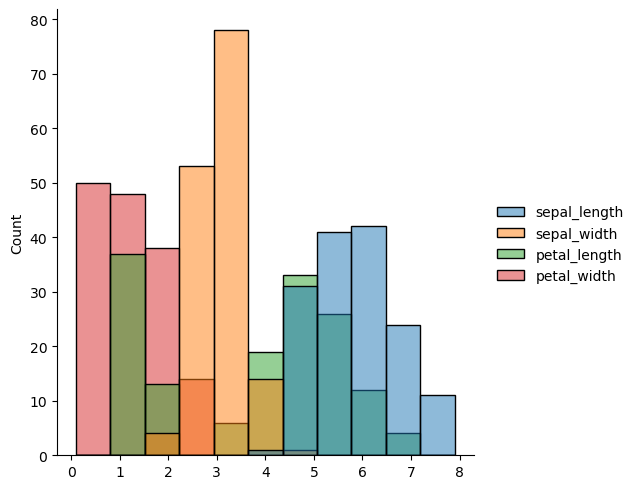

In [62]:
sns.displot(data=data.drop(['species'], axis=1))
plt.show()

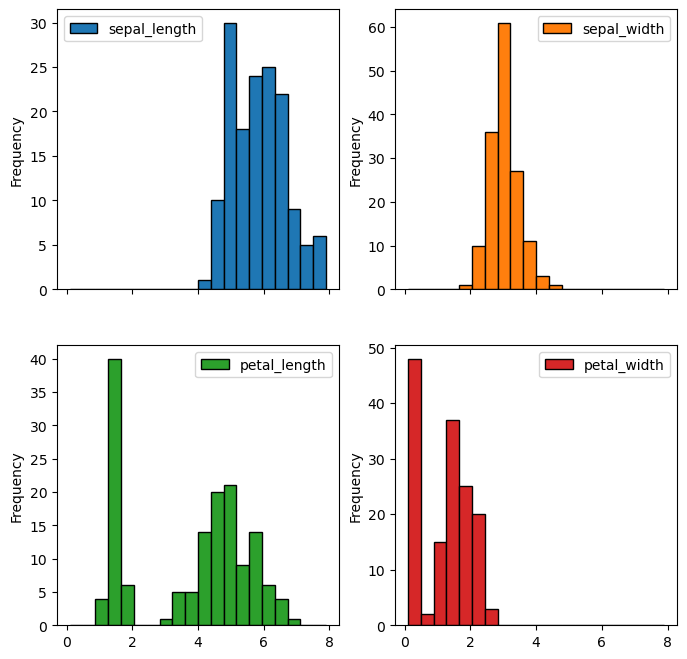

In [63]:
data.plot.hist(subplots=True,edgecolor='black', layout=(2,2), figsize=(8, 8), bins=20)
plt.show()

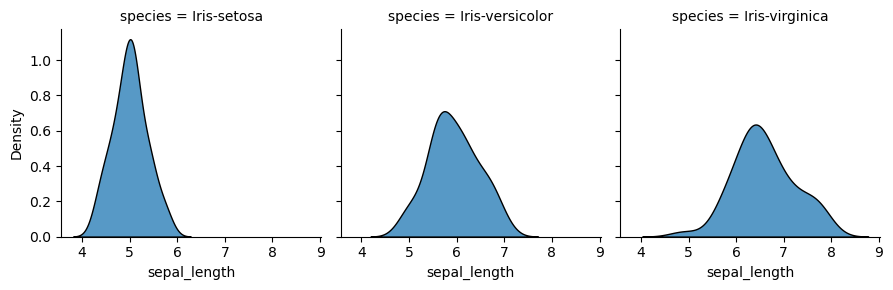

In [64]:
g = sns.FacetGrid(data, col='species')
g = g.map(sns.kdeplot, 'sepal_length', multiple="stack")

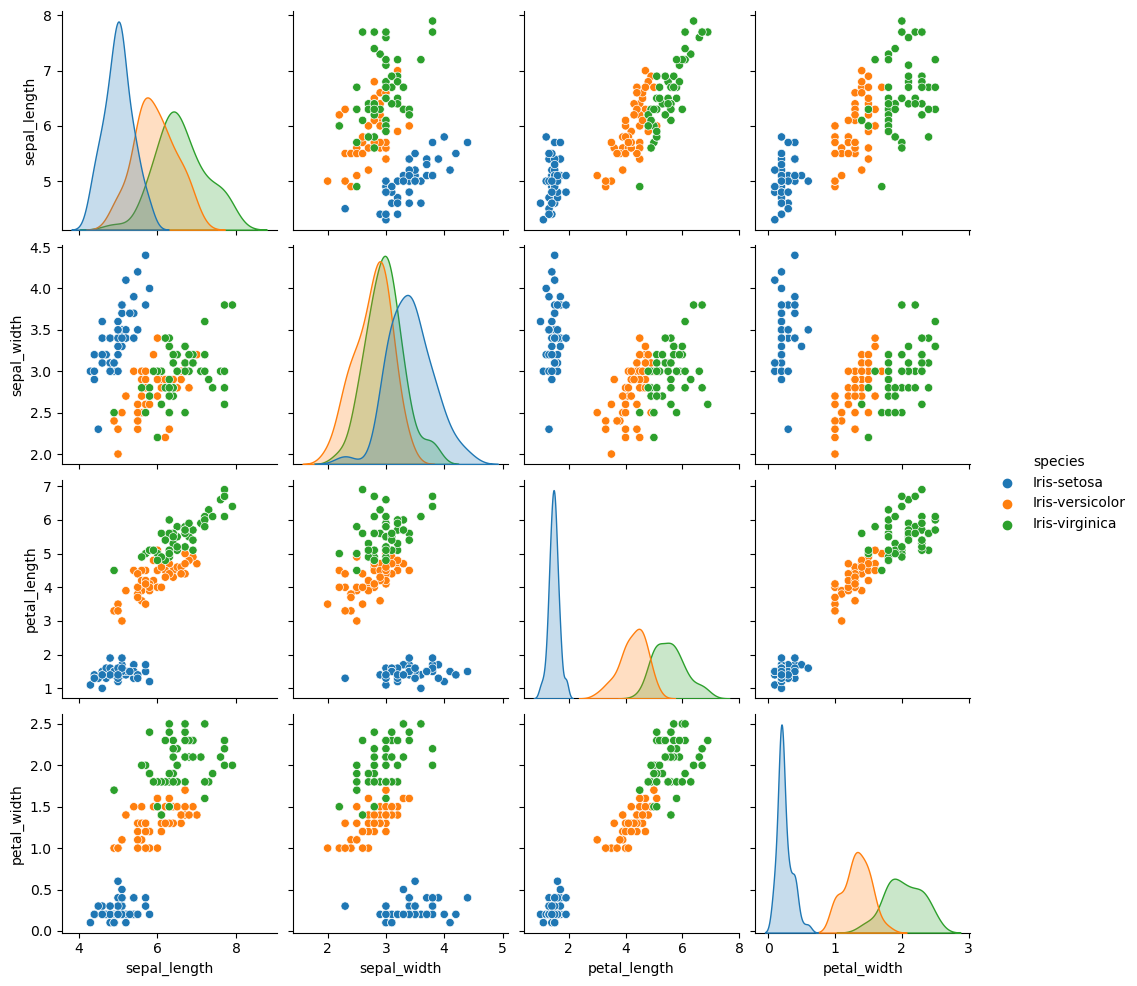

In [65]:
sns.pairplot(data, hue="species")

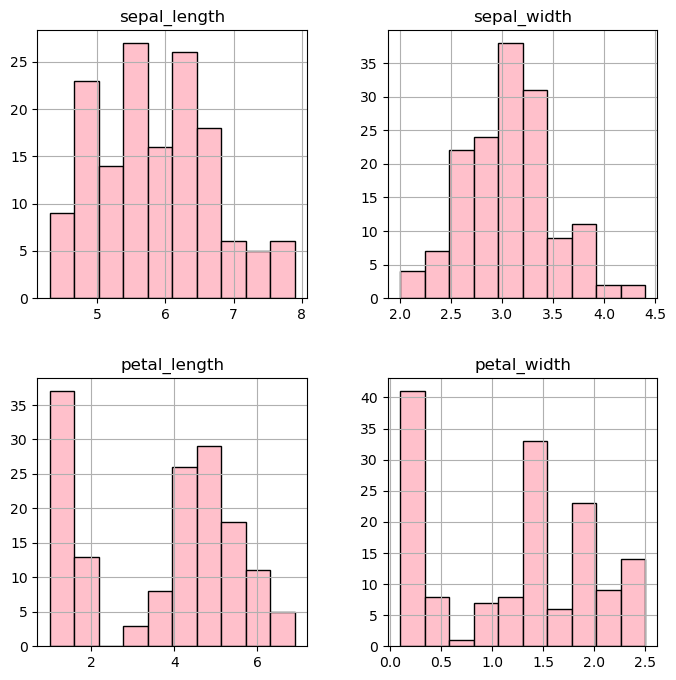

In [66]:
data.hist(color= 'pink',edgecolor='black',figsize=(8,8))
plt.show()

In [67]:
data.corr().style.background_gradient(cmap='cool').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


In [68]:
#Training and testing the model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

x = data.drop('species', axis=1)
y= data.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

In [69]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


In [70]:
#Predicted Values
predict = logreg.predict(x_test)
# compare test and train data
compar = pd.DataFrame({'actual': y_test, 'predicted': predict})
compar = compar.reset_index(drop = True)
compar[:10]

,actual,predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-virginica,Iris-virginica
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-virginica
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor


In [71]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

